In [1]:
using Revise, ReachabilityAnalysis
using Plots, BenchmarkTools

┌ Info: Precompiling ReachabilityAnalysis [1e97bd63-91d1-579d-8e8d-501d2b57c93f]
└ @ Base loading.jl:1260


In [2]:
dirs = BoxDirections(2)

BoxDirections{Float64,LazySets.Arrays.SingleEntryVector{Float64}}(2)

In [29]:
_getdirs(X::LazySet) = [c.a for c in constraints_list(X)]
LazySets.CustomDirections(X) = _getdirs(X)

In [30]:
CustomDirections(X)

6-element Array{Array{Float64,1},1}:
 [-0.22092192347717282, 1.4692682737674165]
 [-0.45856034659451334, 0.25323928933153184]
 [-0.4172094041547034, -0.9755722454436906]
 [0.38804350849431724, -0.5736943999120709]
 [0.6093623495227369, -0.17152217551906912]
 [0.09928581620933541, -0.0017187422241177197]

CustomDirections{Float64,Array{Float64,1}}([[-0.22092192347717282, 1.4692682737674165], [-0.45856034659451334, 0.25323928933153184], [-0.4172094041547034, -0.9755722454436906], [0.38804350849431724, -0.5736943999120709], [0.6093623495227369, -0.17152217551906912], [0.09928581620933541, -0.0017187422241177197]], 2, true, false)

In [36]:
TemplateReachSet(CustomDirections(X), X, 0..1)

TemplateReachSet{Float64,Array{Float64,1},CustomDirections{Float64,Array{Float64,1}},Array{Float64,1}}(CustomDirections{Float64,Array{Float64,1}}([[-0.22092192347717282, 1.4692682737674165], [-0.45856034659451334, 0.25323928933153184], [-0.4172094041547034, -0.9755722454436906], [0.38804350849431724, -0.5736943999120709], [0.6093623495227369, -0.17152217551906912], [0.09928581620933541, -0.0017187422241177197]], 2, true, false), [0.30284326872558265, 0.34038232706800853, 0.7384064040718907, 0.4576405789753622, 0.4380913025168411, 0.07727342765491164], [0, 1])

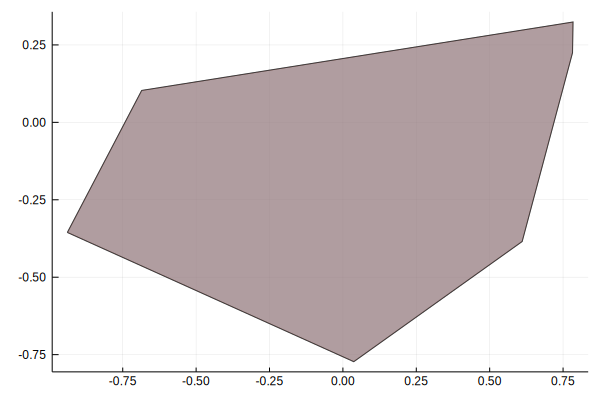

In [37]:
# the sets are the same
plot(TemplateReachSet(CustomDirections(X), X, 0..1), vars=(1, 2))
plot!(X)

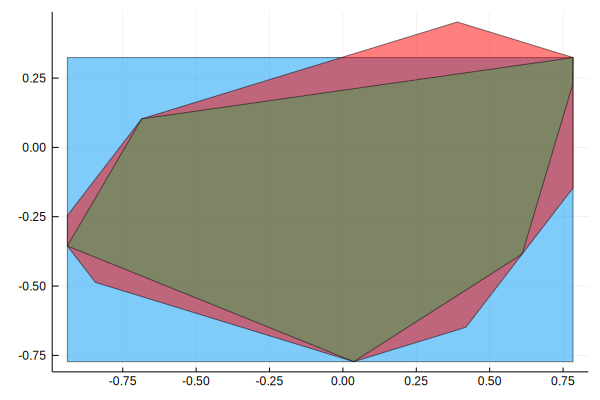

In [17]:
plot(TemplateReachSet(BoxDirections(2), X, 0..1), vars=(1, 2))
plot!(TemplateReachSet(PolarDirections(10), X, 0..1), vars=(1, 2), color=:red)
plot!(X)

In [4]:
T = TemplateReachSet(dirs, [ρ(d, X) for d in dirs], 0 .. 1)

TemplateReachSet{Float64,LazySets.Arrays.SingleEntryVector{Float64},BoxDirections{Float64,LazySets.Arrays.SingleEntryVector{Float64}},Array{Float64,1}}(BoxDirections{Float64,LazySets.Arrays.SingleEntryVector{Float64}}(2), [0.7839012787797395, 0.3239872905097332, 0.7727043837166564, 0.9386062843192092], [0, 1])

In [5]:
project(T, (1, 2))

SparseReachSet{Float64,HPolyhedron{Float64,Array{Float64,1}},2}(HPolyhedron{Float64,Array{Float64,1}}(HalfSpace{Float64,Array{Float64,1}}[HalfSpace{Float64,Array{Float64,1}}([1.0, 0.0], 0.7839012787797395), HalfSpace{Float64,Array{Float64,1}}([0.0, 1.0], 0.3239872905097332), HalfSpace{Float64,Array{Float64,1}}([0.0, -1.0], 0.7727043837166564), HalfSpace{Float64,Array{Float64,1}}([-1.0, 0.0], 0.9386062843192092)]), [0, 1], (1, 2))

In [6]:
N = Float64

Float64

In [7]:
H = Hyperrectangle(N[1, 1], N[2, 2])
P = convert(HPolyhedron, H)

HPolyhedron{Float64,LazySets.Arrays.SingleEntryVector{Float64}}(HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}[HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([1.0, 0.0], 3.0), HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, 1.0], 3.0), HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([-1.0, 0.0], 1.0), HalfSpace{Float64,LazySets.Arrays.SingleEntryVector{Float64}}([0.0, -1.0], 1.0)])

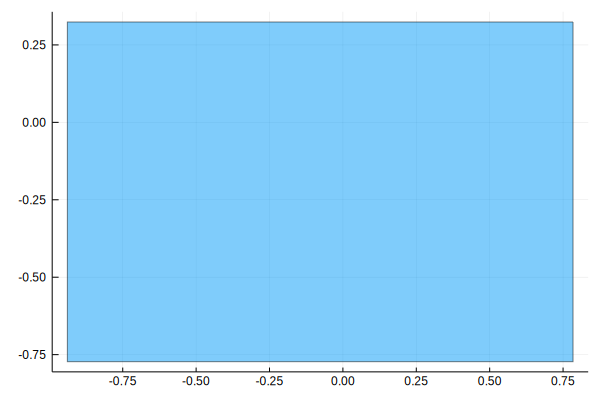

In [8]:
plot(T, vars=(1, 2))

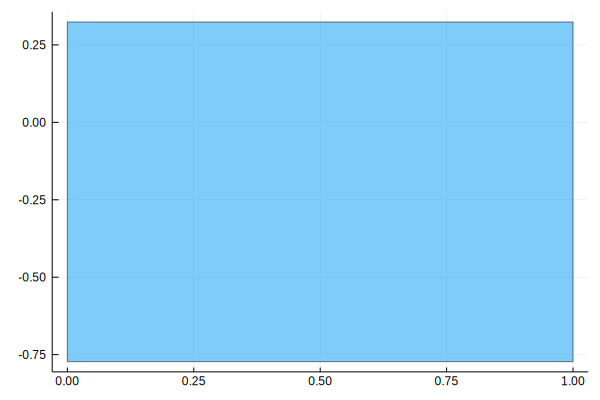

In [9]:
plot(T, vars=(0, 2))